# [教學目標]
以下程式碼將示範如何繪製特定特徵與目標值之間的散佈圖, 更直覺地看出特徵與目標的關係<br>
繪製前需要觀察資料, 將異常值排除, 並且轉換成適合的數值單位輔助觀察<br>
好的圖可以讓你更快認識資料, 繪圖畫的好也是一種藝術<br>
# [範例重點]
直接列出的觀察方式 (In[3], Out[3])<br>
出現異常數值的資料調整方式 (In[4])<br>
散佈圖異常與其調整方式 (Out[5], In[6], Out[6])<br>

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 設定 data_path
dir_data = './data/'
# 讀取 csv 資料檔, 並觀察前幾筆資料 ( .head() )
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 觀察聘雇天數 'DAYS_EMPLOYED' 內的數值
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [5]:
# 由於其他天數都是負值, 且聘僱日數不太可能是 365243 (大約 1000年), 算是異常數字 
# 因此我們推斷這份資料中, DAYS_EMPLOYED 的欄位如果是 365243, 應該是對應到空缺值, 繪圖時應該予以忽略
sub_df = app_train[app_train['DAYS_EMPLOYED'] != 365243]
sub_df['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

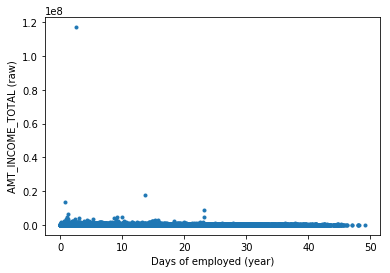

Correlation: 0.0130


In [6]:
# 如果直接畫散布圖 - 看不出任何趨勢或形態
plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['AMT_INCOME_TOTAL'], '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (raw)')
plt.show()
corr = np.corrcoef(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['AMT_INCOME_TOTAL'])
print("Correlation: %.4f" % (corr[0][1]))

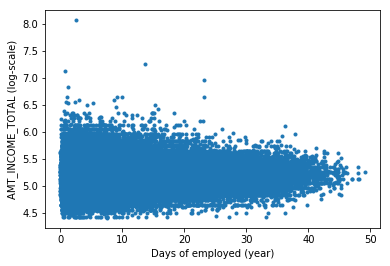

Correlation: 0.0380


In [7]:
# 通常可以對數值範圍較大的取 log 
plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), np.log10(sub_df['AMT_INCOME_TOTAL'] ), '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (log-scale)')
plt.show()
corr = np.corrcoef(sub_df['DAYS_EMPLOYED'] / (-365), np.log10(sub_df['AMT_INCOME_TOTAL']))
print("Correlation: %.4f" % (corr[0][1]))
# 發現雖然沒有相關，但是受雇越久的人，AMT_INCOME_TOTAL 的 variance 越小

# [作業目標]
請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果<br><br>
思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)<br><br>
思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?<br><br>
# [作業重點]
綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性<br><br>

In [8]:
app_train.shape

(307511, 122)

[LabelEncoder複習](https://blog.csdn.net/quintind/article/details/79850455)
是用來對分類型特徵值進行編碼，即對不連續的數值或文本進行編碼。其中包含以下常用方法：
- fit(y) ：fit可看做一本空字典，y可看作要塞到字典中的詞。 
- fit_transform(y)：相當於先進行fit再進行transform，即把y塞到字典中去以後再進行transform得到索引值。 
- inverse_transform(y)：根據索引值y獲得原始資料。 
- transform(y) ：將y轉變成索引值。

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
#app_train['DAYS_EMPLOYED_ANOM'] # true/false 結果
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [13]:
# 觀察所有欄位與 Target 的相關係數
df_corr_Target = pd.DataFrame(app_train.corr()['TARGET']) #app_train.corr()['TARGET'] 是一個series
print(df_corr_Target)

                               TARGET
SK_ID_CURR                  -0.002108
TARGET                       1.000000
NAME_CONTRACT_TYPE          -0.030896
FLAG_OWN_CAR                -0.021851
FLAG_OWN_REALTY             -0.006148
CNT_CHILDREN                 0.019187
AMT_INCOME_TOTAL            -0.003982
AMT_CREDIT                  -0.030369
AMT_ANNUITY                 -0.012817
AMT_GOODS_PRICE             -0.039645
REGION_POPULATION_RELATIVE  -0.037227
DAYS_BIRTH                  -0.078239
DAYS_EMPLOYED                0.074958
DAYS_REGISTRATION            0.041975
DAYS_ID_PUBLISH              0.051457
OWN_CAR_AGE                  0.037612
FLAG_MOBIL                   0.000534
FLAG_EMP_PHONE               0.045982
FLAG_WORK_PHONE              0.028524
FLAG_CONT_MOBILE             0.000370
FLAG_PHONE                  -0.023806
FLAG_EMAIL                  -0.001758
CNT_FAM_MEMBERS              0.009308
REGION_RATING_CLIENT         0.058899
REGION_RATING_CLIENT_W_CITY  0.060893
HOUR_APPR_PR

# 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個<br>

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息<br>

最好的方式當然是畫圖，舉例來說，我們知道 EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919<br>

那我們可以 EXT_SOURCE_3 為 x 軸， TARGET 為 y 軸，把資料給畫出來<br>

In [14]:
# 篩出相關係數最強與最弱的前15個欄位
df_corr_Target['abs_target'] = abs(df_corr_Target['TARGET']) # 加一個絕對值後的欄位
df_corr_Target_sorted = df_corr_Target.sort_values('abs_target', ascending = False)  # 依照絕對值做排序
print(df_corr_Target_sorted['TARGET'].head(15)) 
print(df_corr_Target_sorted['TARGET'].tail(15))

TARGET                         1.000000
EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                 -0.044003
Name: TARGET, dtype: float64
SK_ID_CURR                   -0.002108
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
FLAG_EMAIL                   -0.001758
NONLIVINGAPARTMENTS_MODE     -0.001557
FLAG_DOCUMENT_7              -0.001520
FLAG_DOCUMENT_10             -0.001414
FLAG_DOCUMENT_19             -0.001358
AMT_REQ_CREDIT_BUREAU_HOUR    0.000930
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
FLAG_DOCUMENT_12    

### 觀察相關性最強的欄位的分佈

舉例來說，我們知道 EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 <br>
那我們可以 EXT_SOURCE_3 為 x 軸， TARGET 為 y 軸，把資料給畫出來

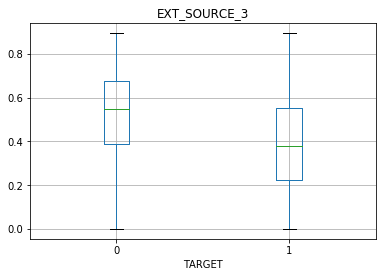

In [15]:
app_train.boxplot(column = 'EXT_SOURCE_3', by = 'TARGET')
plt.suptitle('') # turn off subtitle
plt.show()

In [16]:
# 觀察兩兩變數間的相關性
corr_mat = app_train.corr()
corr_mat.shape[1]
corr_mat.info()
print(corr_mat.head())

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, SK_ID_CURR to DAYS_EMPLOYED_ANOM
Columns: 110 entries, SK_ID_CURR to DAYS_EMPLOYED_ANOM
dtypes: float64(110)
memory usage: 95.4+ KB
                    SK_ID_CURR    TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  \
SK_ID_CURR            1.000000 -0.002108            0.001654      0.001216   
TARGET               -0.002108  1.000000           -0.030896     -0.021851   
NAME_CONTRACT_TYPE    0.001654 -0.030896            1.000000      0.004022   
FLAG_OWN_CAR          0.001216 -0.021851            0.004022      1.000000   
FLAG_OWN_REALTY       0.000703 -0.006148            0.067177     -0.002817   

                    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                 0.000703     -0.001129         -0.001820   
TARGET                    -0.006148      0.019187         -0.003982   
NAME_CONTRACT_TYPE         0.067177      0.029998         -0.003531   
FLAG_OWN_CAR              -0.002817      0.102023        

In [17]:
# 每個欄位與其他欄位相關係數最大的值
abs_corr = corr_mat.abs()
abs_corr.info()
s = abs_corr.unstack()
so = s.sort_values(ascending = False)
so = so[corr_mat.shape[1]+1:] # 去掉corr=1 (因為排序後，corr = 1的總共有欄位數個，故保留從第欄位數+1個)
max_pair = so.idxmax()  # idxmax 找出最大值的位置
print(max_pair)

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, SK_ID_CURR to DAYS_EMPLOYED_ANOM
Columns: 110 entries, SK_ID_CURR to DAYS_EMPLOYED_ANOM
dtypes: float64(110)
memory usage: 95.4+ KB
('OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE')


In [18]:
# 另一種方法
corr_mat[corr_mat!=1].abs().max().sort_values(ascending = False).head(30)
corr_mat['DAYS_EMPLOYED_ANOM'][corr_mat['DAYS_EMPLOYED_ANOM']<-0.9998]
corr_mat['AMT_CREDIT'][corr_mat['AMT_CREDIT']>0.98]

AMT_CREDIT         1.000000
AMT_GOODS_PRICE    0.986968
Name: AMT_CREDIT, dtype: float64

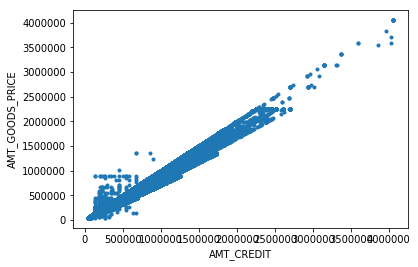

In [19]:
# plot 
plt.plot(app_train['AMT_CREDIT'],app_train['AMT_GOODS_PRICE'], '.')
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

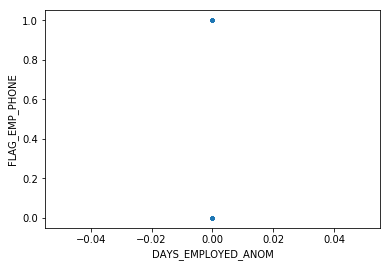

In [20]:
# plot 
plt.plot(app_train['DAYS_EMPLOYED_ANOM'],app_train['FLAG_EMP_PHONE'], '.')
plt.xlabel('DAYS_EMPLOYED_ANOM')
plt.ylabel('FLAG_EMP_PHONE')
plt.show()

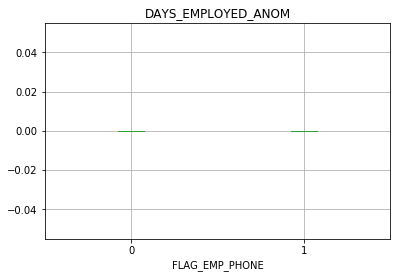

In [21]:
app_train.boxplot(column = 'DAYS_EMPLOYED_ANOM', by = 'FLAG_EMP_PHONE')
plt.suptitle('') # turn off subtitle
plt.show()

In [23]:
# example of corr
sub_df = app_train.loc[0:1000, ['AMT_CREDIT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','DAYS_EMPLOYED','OWN_CAR_AGE']]
sub_corr = sub_df.corr()
abs(sub_corr[sub_corr!=1]).max()  # 相關係數取決對職後最大的

AMT_CREDIT          0.986030
AMT_GOODS_PRICE     0.986030
AMT_INCOME_TOTAL    0.439771
DAYS_EMPLOYED       0.141575
OWN_CAR_AGE         0.245352
dtype: float64

In [24]:
sub_corr[sub_corr['AMT_CREDIT']>0.98]  

,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,DAYS_EMPLOYED,OWN_CAR_AGE
AMT_CREDIT,1.00000,0.98603,0.429200,-0.136273,-0.126970
AMT_GOODS_PRICE,0.98603,1.00000,0.439771,-0.141575,-0.135576


In [25]:
sub_corr['AMT_CREDIT'][sub_corr['AMT_CREDIT']>0.98] # 列出AMT_CREDIT(column)這個欄位數值大於0.98

AMT_CREDIT         1.00000
AMT_GOODS_PRICE    0.98603
Name: AMT_CREDIT, dtype: float64

## 找出相關係數最高的兩個變數

In [26]:
## example by chibao
df = pd.DataFrame(
        {'x1':[i[0] for i in np.random.rand(10,1).tolist()],
         'x2':[i[0] for i in np.random.rand(10,1).tolist()],
         'x3':[i[0] for i in np.random.rand(10,1).tolist()]              
        })
    
df.head()

,x1,x2,x3
0,0.357539,0.586427,0.983085
1,0.586972,0.293538,0.250725
2,0.577476,0.021291,0.494566
3,0.007354,0.649026,0.884479
4,0.777114,0.310262,0.169397


In [27]:
df_corr = df.corr()
print(df_corr)
df_corr_abs = df_corr.abs()
print(df_corr_abs)

          x1        x2        x3
x1  1.000000 -0.165307 -0.439190
x2 -0.165307  1.000000  0.438703
x3 -0.439190  0.438703  1.000000
          x1        x2        x3
x1  1.000000  0.165307  0.439190
x2  0.165307  1.000000  0.438703
x3  0.439190  0.438703  1.000000


[unstack 解釋](https://www.itread01.com/content/1544523853.html)

In [28]:
s = df_corr_abs.unstack() 
print(s)
so = s.sort_values(ascending = False)
print(so)

x1  x1    1.000000
    x2    0.165307
    x3    0.439190
x2  x1    0.165307
    x2    1.000000
    x3    0.438703
x3  x1    0.439190
    x2    0.438703
    x3    1.000000
dtype: float64
x3  x3    1.000000
x2  x2    1.000000
x1  x1    1.000000
x3  x1    0.439190
x1  x3    0.439190
x3  x2    0.438703
x2  x3    0.438703
    x1    0.165307
x1  x2    0.165307
dtype: float64


In [29]:
so = so[df.shape[1]+1:] # 去掉corr=1 (因為排序後，corr = 1的總共有欄位數個，故保留從第欄位數+1個)
print(so)
max_pair = so.idxmax()    # idxmax 找出最大值的位置
print(max_pair)

x1  x3    0.439190
x3  x2    0.438703
x2  x3    0.438703
    x1    0.165307
x1  x2    0.165307
dtype: float64
('x1', 'x3')
